In [1]:
from utils import plot_similarity_histogram, get_tanimoto_similarity_triangle, plot_histogram_with_two_y_axes, get_actives_inactives_similarity_flat, scaffold_dataset_splitter
import pandas as pd

2024-09-24 14:20:48.607791: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 14:20:48.695445: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 14:20:48.695503: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 14:20:48.697553: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 14:20:48.709894: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 14:20:48.711063: I tensorflow/core/platform/cpu_feature_guard.cc:1

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


# Dataset filtrado general

In [2]:
df = pd.read_pickle("../data/raw/data_chembl34_filtrada_02_09_24.pkl")

# Armado de dataset


In [3]:
target = "CHEMBL5567"
df_target = df[df.target == target]
df_target

,molregno,comp_id,tid,assay_id,target,relation,bioactivity,units,type,potential_duplicate,...,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,np_likeness_score,sequence,sequence_organism,binary_bioactivity
3056,170501,CHEMBL102936,101018,933383,CHEMBL5567,=,20574.9,nM,AC50,0,...,0.64,370.1100,C18H18N4O3S,7.0,3.0,0.0,-1.56,MEDAKNIKKGPAPFYPLEDGTAGEQLHKAMKRYALVPGTIAFTDAH...,Photinus pyralis,0
3214,169196,CHEMBL103080,101018,933383,CHEMBL5567,=,20574.9,nM,AC50,0,...,0.64,370.1100,C18H18N4O3S,7.0,3.0,0.0,-1.68,MEDAKNIKKGPAPFYPLEDGTAGEQLHKAMKRYALVPGTIAFTDAH...,Photinus pyralis,0
3244,166116,CHEMBL103104,101018,933383,CHEMBL5567,=,20574.9,nM,AC50,0,...,0.58,330.0787,C15H14N4O3S,7.0,5.0,0.0,-1.41,MEDAKNIKKGPAPFYPLEDGTAGEQLHKAMKRYALVPGTIAFTDAH...,Photinus pyralis,0
30260,187532,CHEMBL112115,101018,688300,CHEMBL5567,=,51511.0,nM,EC50,0,...,0.63,210.0793,C13H10N2O,3.0,2.0,0.0,-1.18,MEDAKNIKKGPAPFYPLEDGTAGEQLHKAMKRYALVPGTIAFTDAH...,Photinus pyralis,0
42308,10122,CHEMBL11909,101018,688300,CHEMBL5567,>,112219.0,nM,EC50,0,...,0.49,267.0968,C10H13N5O4,9.0,5.0,0.0,1.31,MEDAKNIKKGPAPFYPLEDGTAGEQLHKAMKRYALVPGTIAFTDAH...,Photinus pyralis,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273773,143131,CHEMBL88612,101018,476211,CHEMBL5567,>,100000.0,nM,IC50,0,...,0.71,195.1048,C14H13N,1.0,0.0,0.0,-0.81,MEDAKNIKKGPAPFYPLEDGTAGEQLHKAMKRYALVPGTIAFTDAH...,Photinus pyralis,0
1278148,150530,CHEMBL92816,101018,514920,CHEMBL5567,=,200.0,nM,IC50,0,...,0.69,254.0878,C15H14N2S,2.0,0.0,0.0,-2.06,MEDAKNIKKGPAPFYPLEDGTAGEQLHKAMKRYALVPGTIAFTDAH...,Photinus pyralis,1
1281357,158843,CHEMBL95502,101018,933383,CHEMBL5567,=,41052.3,nM,AC50,0,...,0.70,394.2281,C22H27FN6,6.0,3.0,0.0,-0.78,MEDAKNIKKGPAPFYPLEDGTAGEQLHKAMKRYALVPGTIAFTDAH...,Photinus pyralis,0
1281858,93895,CHEMBL960,101018,688634,CHEMBL5567,=,891.3,nM,Potency,0,...,0.91,270.0616,C12H9F3N2O2,4.0,1.0,0.0,-2.04,MEDAKNIKKGPAPFYPLEDGTAGEQLHKAMKRYALVPGTIAFTDAH...,Photinus pyralis,1


In [4]:
df_target[df_target.duplicated(subset="comp_id")]

,molregno,comp_id,tid,assay_id,target,relation,bioactivity,units,type,potential_duplicate,...,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,np_likeness_score,sequence,sequence_organism,binary_bioactivity


# Estudio de diversidad quimica de compuestos

100%|██████████| 1874/1874 [00:37<00:00, 49.59it/s]


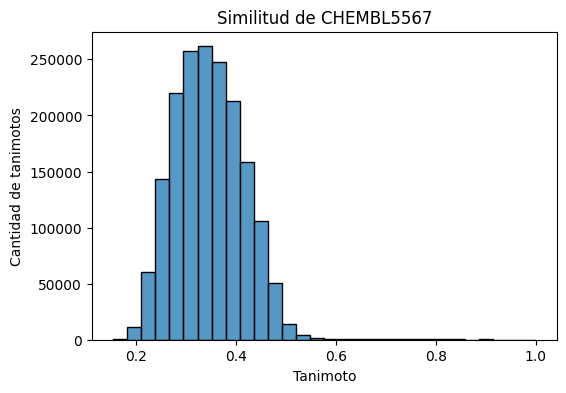

In [5]:
similarity_triangle = get_tanimoto_similarity_triangle(df_target)
plot_similarity_histogram(similarity_triangle,target)

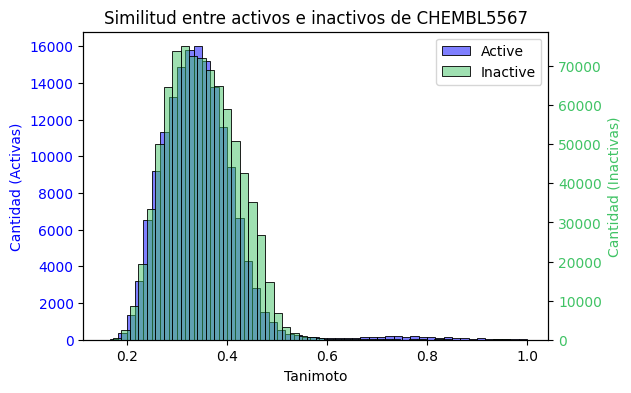

In [6]:
actives, inactives = get_actives_inactives_similarity_flat(df_target, similarity_triangle)

plot_histogram_with_two_y_axes(actives,inactives,target)

splitting

In [7]:
dataset_splited = scaffold_dataset_splitter(df_target)

dataset_splited.to_csv(f"../data/processed/{target}_chemblv34.csv",index=False)